## Here is the link for comparison chart
https://docs.google.com/presentation/d/1iAe94Mm6ivEXt3h93QMnV80-NdvdVrkd/edit?usp=share_link&ouid=103091898950983807808&rtpof=true&sd=true


In [ ]:
import tensorflow as tf
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
trdata = ImageDataGenerator(rescale = 1.0/255.0)
traindata = trdata.flow_from_directory(directory="/content/drive/MyDrive/vgg16/men_women/train",target_size=(224,224))
tsdata = ImageDataGenerator(rescale = 1.0/255.0)
testdata = tsdata.flow_from_directory(directory="/content/drive/MyDrive/vgg16/men_women/test", target_size=(224,224))

Found 996 images belonging to 2 classes.
Found 259 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [ ]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.00001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("/content/drive/MyDrive/vgg16/vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(generator=traindata, validation_data= testdata, validation_steps=1,epochs=30,callbacks=[checkpoint,early])
model.save("/content/drive/MyDrive/vgg16/vgg16_1.h5")
np.save("/content/drive/MyDrive/vgg16.npy",hist.history)
#hist = model.fit_generator(steps_per_epoch=100,generator=traindata, validation_data= testdata, validation_steps=10,epochs=100,callbacks=[checkpoint,early])

<ipython-input-8-a715c6d67f11>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(generator=traindata, validation_data= testdata, validation_steps=1,epochs=30,callbacks=[checkpoint,early])


Epoch 1/30
32/32 [==============================] - ETA: 0s - loss: 0.6929 - accuracy: 0.5090
Epoch 1: val_accuracy improved from -inf to 0.56250, saving model to /content/drive/MyDrive/vgg16/vgg16_1.h5
32/32 [==============================] - 49s 1s/step - loss: 0.6929 - accuracy: 0.5090 - val_loss: 0.6933 - val_accuracy: 0.5625
Epoch 2/30
32/32 [==============================] - ETA: 0s - loss: 0.6911 - accuracy: 0.5522
Epoch 2: val_accuracy did not improve from 0.56250
32/32 [==============================] - 24s 696ms/step - loss: 0.6911 - accuracy: 0.5522 - val_loss: 0.7067 - val_accuracy: 0.4688
Epoch 3/30
32/32 [==============================] - ETA: 0s - loss: 0.6873 - accuracy: 0.5402
Epoch 3: val_accuracy improved from 0.56250 to 0.62500, saving model to /content/drive/MyDrive/vgg16/vgg16_1.h5
32/32 [==============================] - 34s 1s/step - loss: 0.6873 - accuracy: 0.5402 - val_loss: 0.6786 - val_accuracy: 0.6250
Epoch 4/30
32/32 [==============================] - ETA:

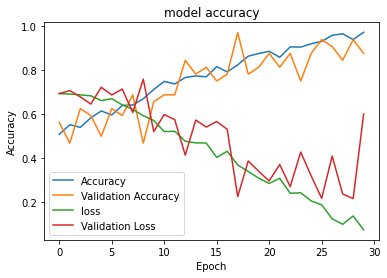

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

1/1 [==============================] - 0s 130ms/step
men


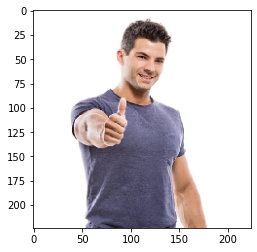

In [ ]:
from keras.preprocessing import image
img = tf.keras.utils.load_img("/content/drive/MyDrive/vgg16/men_women/test/men130/00000005.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("/content/drive/MyDrive/vgg16/vgg16_1.h5")

output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("men")
else:
    print('women')

1/1 [==============================] - 0s 128ms/step
women


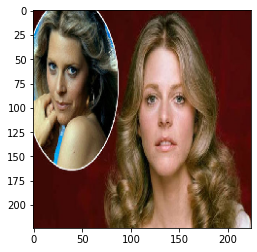

In [ ]:
from keras.preprocessing import image
img = tf.keras.utils.load_img("/content/00001333.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("/content/drive/MyDrive/vgg16/vgg16_1.h5")

output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("men")
else:
    print('women')

## for Augmented dataset

In [ ]:
trdata = ImageDataGenerator(rescale = 1.0/255.0)
traindata = trdata.flow_from_directory(directory="/content/drive/MyDrive/vgg16/men_women/Augmented_dataset/train",target_size=(224,224))
tsdata = ImageDataGenerator(rescale = 1.0/255.0)
testdata = tsdata.flow_from_directory(directory="/content/drive/MyDrive/vgg16/men_women/Augmented_dataset/test", target_size=(224,224))

Found 949 images belonging to 2 classes.
Found 260 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [ ]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.00001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:

from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("/content/drive/MyDrive/vgg16/men_women/Augmented_dataset/vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(generator=traindata, validation_data= testdata, validation_steps=1,epochs=30,callbacks=[checkpoint,early])
model.save("/content/drive/MyDrive/vgg16/men_women/Augmented_dataset/vgg16_1.h5")
np.save("/content/drive/MyDrive/vgg16/men_women/Augmented_dataset/vgg16_1.npy",hist.history)
#hist = model.fit_generator(steps_per_epoch=100,generator=traindata, validation_data= testdata, validation_steps=10,epochs=100,callbacks=[checkpoint,early])

<ipython-input-16-e63b3d04a6ce>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(generator=traindata, validation_data= testdata, validation_steps=1,epochs=30,callbacks=[checkpoint,early])


Epoch 1/30
30/30 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.4900  
Epoch 1: val_accuracy improved from -inf to 0.40625, saving model to /content/drive/MyDrive/vgg16/men_women/Augmented_dataset/vgg16_1.h5
30/30 [==============================] - 1958s 65s/step - loss: 0.6932 - accuracy: 0.4900 - val_loss: 0.6937 - val_accuracy: 0.4062
Epoch 2/30
30/30 [==============================] - ETA: 0s - loss: 0.6930 - accuracy: 0.5406  
Epoch 2: val_accuracy improved from 0.40625 to 0.56250, saving model to /content/drive/MyDrive/vgg16/men_women/Augmented_dataset/vgg16_1.h5
30/30 [==============================] - 2035s 68s/step - loss: 0.6930 - accuracy: 0.5406 - val_loss: 0.6925 - val_accuracy: 0.5625
Epoch 3/30
30/30 [==============================] - ETA: 0s - loss: 0.6925 - accuracy: 0.5258  
Epoch 3: val_accuracy did not improve from 0.56250
30/30 [==============================] - 1912s 63s/step - loss: 0.6925 - accuracy: 0.5258 - val_loss: 0.6925 - val_accur

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

1/1 [==============================] - 1s 874ms/step
women


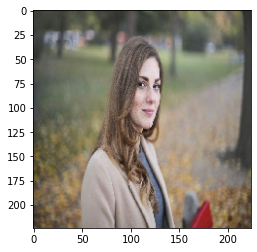

In [ ]:
from keras.preprocessing import image
img = tf.keras.utils.load_img("/content/drive/MyDrive/vgg16/men_women/test/women130/00000002.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("/content/drive/MyDrive/vgg16/men_women/Augmented_dataset/vgg16_1.h5")

output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("men")
else:
    print('women')

1/1 [==============================] - 1s 764ms/step
women


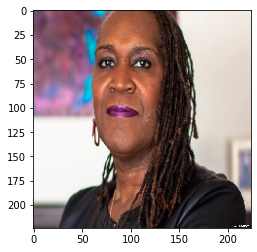

In [ ]:
from keras.preprocessing import image
img = tf.keras.utils.load_img("/content/00001306.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("/content/drive/MyDrive/vgg16/men_women/Augmented_dataset/vgg16_1.h5")

output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("men")
else:
    print('women')

In [ ]:
n=np.load("/content/drive/MyDrive/vgg16/men_women/Augmented_dataset/vgg16_1.npy", allow_pickle = True)
n

array({'loss': [0.6931951642036438, 0.6930484771728516, 0.6930116415023804, 0.6928773522377014, 0.692780613899231, 0.6926780939102173, 0.6925094723701477, 0.6924397945404053, 0.6921407580375671, 0.6919953227043152, 0.6918128728866577, 0.6911937594413757, 0.6907951235771179, 0.6901440620422363, 0.6892929673194885, 0.6886547207832336, 0.6873658299446106, 0.6872328519821167, 0.6852530837059021, 0.683067798614502, 0.6811656951904297, 0.6782004237174988, 0.6751090288162231, 0.670571506023407, 0.6671677827835083, 0.6716280579566956, 0.6661797761917114, 0.660072922706604, 0.6577552556991577, 0.654597282409668], 'accuracy': [0.5247629284858704, 0.5447840094566345, 0.5289778709411621, 0.5331928133964539, 0.5848261117935181, 0.5985247492790222, 0.6006322503089905, 0.5574288964271545, 0.5900948643684387, 0.5732349753379822, 0.5679662823677063, 0.5858798623085022, 0.5848261117935181, 0.5985247492790222, 0.5964173078536987, 0.5763962268829346, 0.5795574188232422, 0.5795574188232422, 0.5795574188232

##Plot for Augmented Dataset

In [ ]:
Plot for Augmented Dataset

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame()

In [ ]:
dict = {'loss' : [0.6931951642036438, 0.6930484771728516, 0.6930116415023804, 0.6928773522377014, 0.692780613899231, 0.6926780939102173, 0.6925094723701477, 0.6924397945404053, 0.6921407580375671, 0.6919953227043152, 0.6918128728866577, 0.6911937594413757, 0.6907951235771179, 0.6901440620422363, 0.6892929673194885, 0.6886547207832336, 0.6873658299446106, 0.6872328519821167, 0.6852530837059021, 0.683067798614502, 0.6811656951904297, 0.6782004237174988, 0.6751090288162231, 0.670571506023407, 0.6671677827835083, 0.6716280579566956, 0.6661797761917114, 0.660072922706604, 0.6577552556991577, 0.654597282409668],
        'accuracy' : [0.5247629284858704, 0.5447840094566345, 0.5289778709411621, 0.5331928133964539, 0.5848261117935181, 0.5985247492790222, 0.6006322503089905, 0.5574288964271545, 0.5900948643684387, 0.5732349753379822, 0.5679662823677063, 0.5858798623085022, 0.5848261117935181, 0.5985247492790222, 0.5964173078536987, 0.5763962268829346, 0.5795574188232422, 0.5795574188232422, 0.5795574188232422, 0.5911485552787781, 0.6006322503089905, 0.5953635573387146, 0.6090621948242188, 0.5974709987640381, 0.6027397513389587, 0.5922023057937622, 0.5974709987640381, 0.6174920797348022, 0.6111696362495422, 0.6090621948242188],
         'val_loss': [0.6933412551879883, 0.6932358741760254, 0.693338930606842, 0.6932664513587952, 0.6926500797271729, 0.6931321620941162, 0.6929500699043274, 0.6928502321243286, 0.6941030621528625, 0.6940930485725403, 0.6930899620056152, 0.6931267976760864, 0.6918920874595642, 0.6844817399978638, 0.6837774515151978, 0.6976904273033142, 0.6889481544494629, 0.6931779384613037, 0.6930345296859741, 0.6766495704650879, 0.6744422316551208, 0.6936368346214294, 0.6834495067596436, 0.687650203704834, 0.7065399885177612, 0.6575489044189453, 0.6813733577728271, 0.6889137029647827, 0.6574229001998901, 0.6816388964653015],
        'val_accuracy': [0.40625, 0.40625, 0.46875, 0.46875, 0.59375, 0.4375, 0.5625, 0.53125, 0.375, 0.4375, 0.4375, 0.5, 0.5, 0.6875, 0.5625, 0.4375, 0.5625, 0.5625, 0.53125, 0.59375, 0.625, 0.53125, 0.5625, 0.53125, 0.5625, 0.65625, 0.53125, 0.53125, 0.5, 0.59375]
}



In [ ]:
df = pd.DataFrame(dict)

In [ ]:
df

,loss,accuracy,val_loss,val_accuracy
0,0.693195,0.524763,0.693341,0.40625
1,0.693048,0.544784,0.693236,0.40625
2,0.693012,0.528978,0.693339,0.46875
3,0.692877,0.533193,0.693266,0.46875
4,0.692781,0.584826,0.692650,0.59375
5,0.692678,0.598525,0.693132,0.43750
6,0.692509,0.600632,0.692950,0.56250
7,0.692440,0.557429,0.692850,0.53125
8,0.692141,0.590095,0.694103,0.37500
9,0.691995,0.573235,0.694093,0.43750


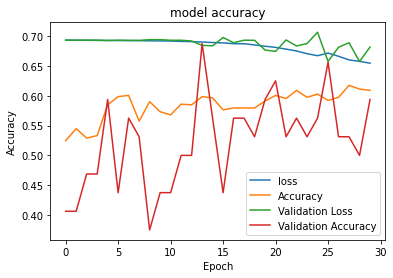

In [ ]:
import matplotlib.pyplot as plt
x = [i for i in range(0,30)]
plt.plot(x, df['loss'])
plt.plot(x, df['accuracy'])
plt.plot(x, df['val_loss'])
plt.plot(x, df['val_accuracy'])

plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["loss","Accuracy","Validation Loss","Validation Accuracy"])
plt.show()